# Free energies and mutual info priors

In [1]:
import pandas as pd
from tramp.experiments import qplot

In [2]:
#%run prior_free_energies.py

In [3]:
df = pd.read_csv("prior_free_energies.csv")
df_g = df.query("prior_type=='gaussian'")
df_gb = df.query("prior_type=='gauss_bernouilli'")
df_b = df.query("prior_type=='binary'")

## Sparse prior

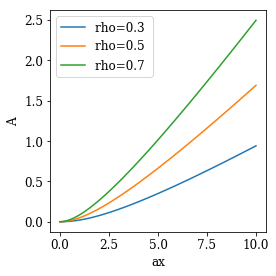

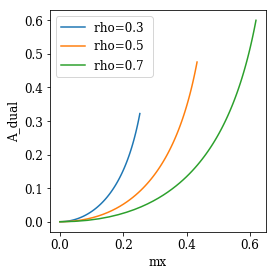

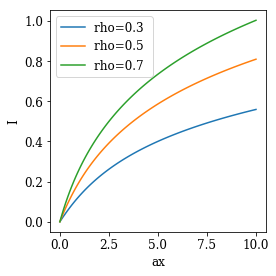

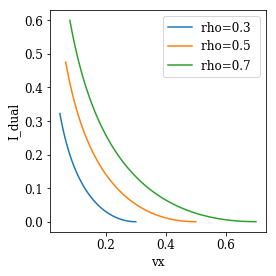

In [4]:
qplot(df_gb,  x="ax", y="A", color="rho")
qplot(df_gb,  x="mx", y="A_dual", color="rho")
qplot(df_gb,  x="ax", y="I", color="rho")
qplot(df_gb,  x="vx", y="I_dual", color="rho")

## Binary prior

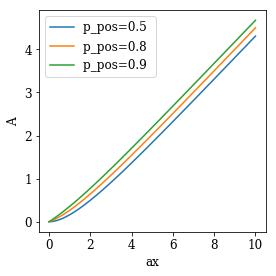

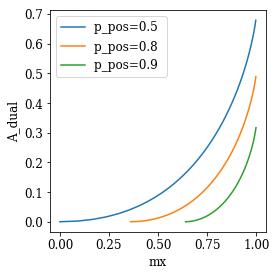

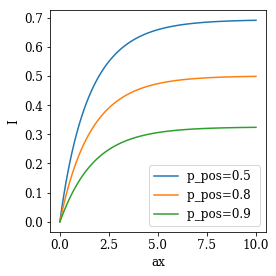

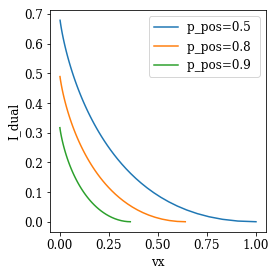

In [5]:
qplot(df_b,  x="ax", y="A", color="p_pos")
qplot(df_b,  x="mx", y="A_dual", color="p_pos")
qplot(df_b,  x="ax", y="I", color="p_pos")
qplot(df_b,  x="vx", y="I_dual", color="p_pos")

## Gaussian prior

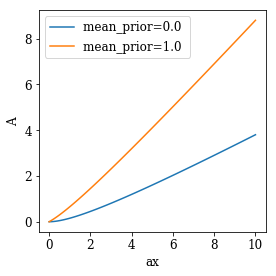

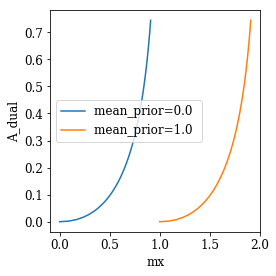

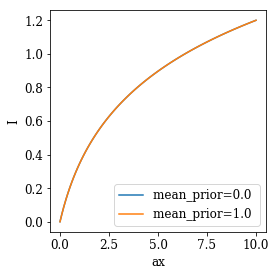

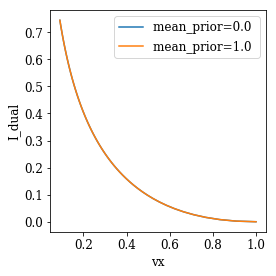

In [6]:
qplot(df_g,  x="ax", y="A", color="mean_prior")
qplot(df_g,  x="mx", y="A_dual", color="mean_prior")
qplot(df_g,  x="ax", y="I", color="mean_prior")
qplot(df_g,  x="vx", y="I_dual", color="mean_prior")

## Check I-MMSE and A-overlap

In [7]:
def check_gradient(subset):
    check = df.query(subset).sort_values(by="ax")
    check["I_prime"] = 2 * check["I"].diff() / check["ax"].diff()
    check["A_prime"] = 2 * check["A"].diff() / check["ax"].diff()
    qplot(check, x="ax", y=["vx", "mx", "I_prime", "A_prime"], y_markers=["-", "-", "--", "--"])

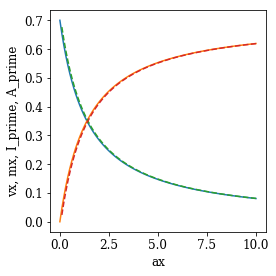

In [8]:
check_gradient("rho==0.7")

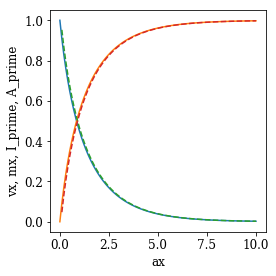

In [9]:
check_gradient("p_pos==0.5")

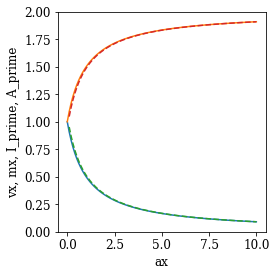

In [10]:
check_gradient("mean_prior==1")

## Check dual 

In [11]:
def check_reverse(subset):
    check = df.query(subset).sort_values(by="vx")
    check["I_dual_prime"] = -2 * check["I_dual"].diff() / check["vx"].diff()
    check["A_dual_prime"] = 2 * check["A_dual"].diff() / check["mx"].diff()
    qplot(
        check, x="mx", y=["ax", "I_dual_prime", "A_dual_prime"], y_markers=["-", "--", "-."], 
        y_legend=True
    )

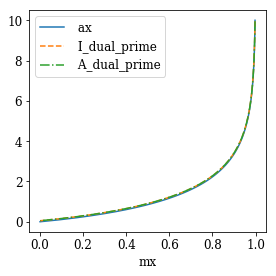

In [12]:
check_reverse("p_pos==0.5")

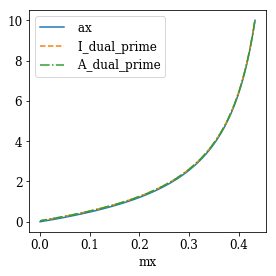

In [13]:
check_reverse("rho==0.5")

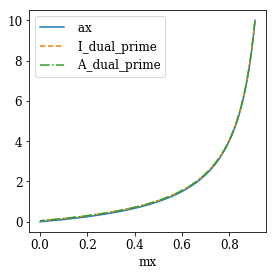

In [14]:
check_reverse("mean_prior==0")